# Demo: Linear SVM v.s. Kernel SVM

In [58]:
import numpy as np
import matplotlib.pyplot as plt


Let's first create a dataset such that:
$$x \in [-2,2]^2$$
$$y \in \{0,1\}, y = 1 \quad \text{iff} \quad x_1^2 + x_2^2 > 1$$


In [31]:
x_low = -2
x_high = 2
x = np.random.uniform(low=x_low, high=x_high, size=(1000, 2))
y = np.power(x,2).sum(axis=1) > 1
x_positive = x[y,:]
x_negative = x[~y,:]
y = y.astype(int)


Let's visualize the data.

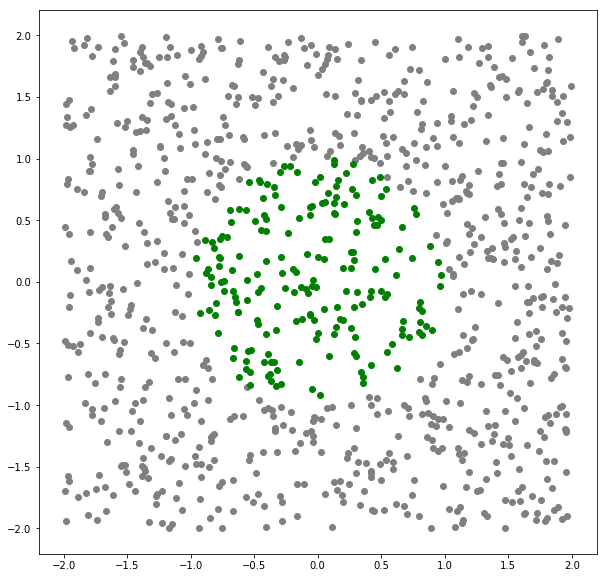

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(x_positive[:,0],x_positive[:,1],color="grey")
plt.scatter(x_negative[:,0],x_negative[:,1],color="green")
plt.show()

Let's first fit a linear SVM and see how it behaves.

In [55]:
from sklearn.svm import SVC
cls = SVC(C=1.0, kernel='linear')
cls.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Let's draw the decision boundary and the support vectors for this linear SVM.

As we can see, linear SVM works very badly and all negative points become support vectors.

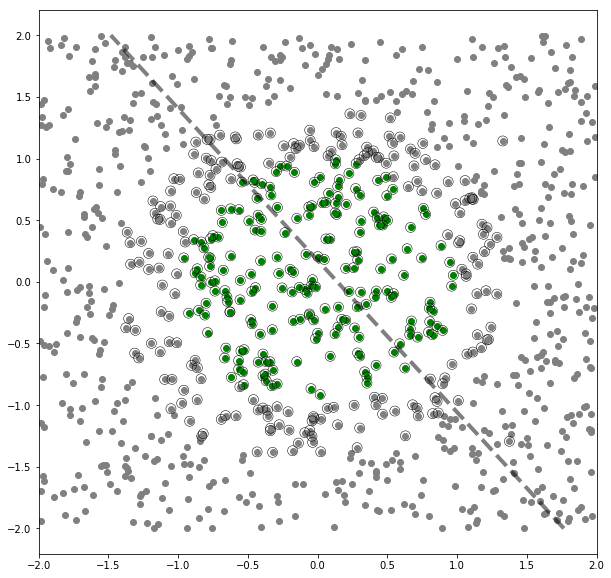

In [56]:
# create grid to evaluate model
xx = np.linspace(x_low, x_high, 30)
yy = np.linspace(x_low, x_high, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = cls.decision_function(xy).reshape(XX.shape)

# original plot
plt.figure(figsize=(10,10))
plt.scatter(x_positive[:,0],x_positive[:,1],color="grey")
plt.scatter(x_negative[:,0],x_negative[:,1],color="green")
# plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], linewidths=4)
# plot support vectors
plt.scatter(cls.support_vectors_[:, 0], cls.support_vectors_[:, 1], s=100,
           linewidth=0.5, facecolors='none', edgecolors='k')

plt.show()

Now let's fit an SVM with RBF kernel.

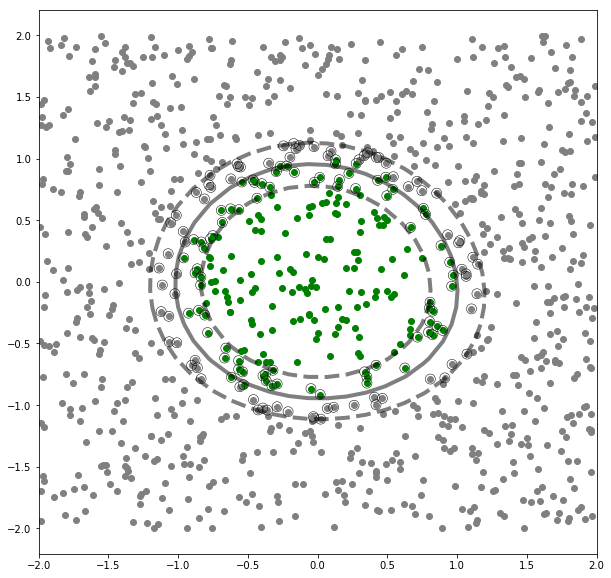

In [57]:
cls_kernel = SVC(C=1.0, kernel='rbf')
cls_kernel.fit(x,y)
# create grid to evaluate model
xx = np.linspace(x_low, x_high, 30)
yy = np.linspace(x_low, x_high, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = cls_kernel.decision_function(xy).reshape(XX.shape)

# original plot
plt.figure(figsize=(10,10))
plt.scatter(x_positive[:,0],x_positive[:,1],color="grey")
plt.scatter(x_negative[:,0],x_negative[:,1],color="green")
# plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], linewidths=4)
# plot support vectors
plt.scatter(cls_kernel.support_vectors_[:, 0], cls_kernel.support_vectors_[:, 1], s=100,
           linewidth=0.5, facecolors='none', edgecolors='k')

plt.show()